# HOME CREDIT INDONESIA SCORING

## Import Data & Library

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')

## Exploratory Data Analysis (EDA)

In [3]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 123 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [55]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0
AMT_REQ_CREDIT_BUREAU_YEAR,265992.0,1.899974,1.869295,0.0,0.0,1.0,3.0,25.0


In [59]:
df_train.describe(include=["object"]).T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186
WEEKDAY_APPR_PROCESS_START,307511,7,TUESDAY,53901


### Pengguna yang menggunakan sistem pinjaman

TARGET
0    282686
1     24825
Name: count, dtype: int64
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


<Axes: xlabel='TARGET', ylabel='count'>

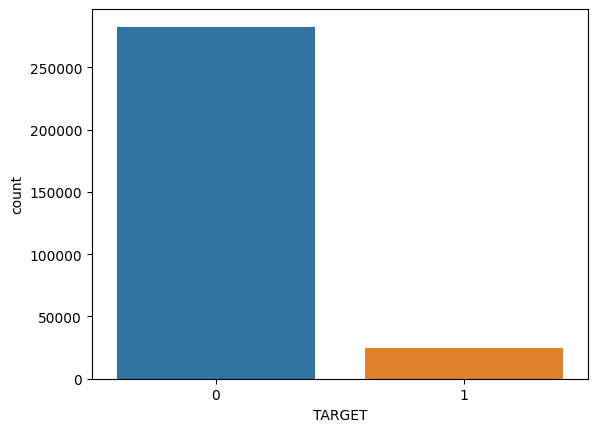

In [12]:
print(df_train.TARGET.value_counts())
print(df_train["TARGET"].value_counts(normalize=True))
sns.countplot(data=df_train, x='TARGET')

Dapat dilihat dari angka persenan bahwa ada 92% orang yang sanggup membayar hutang pada waktunya dan sisa 8% terdapat masalah dalam membayar hutang pada waktunya, saatnya kita analis lebih lanjut satu per satu mengenai subjek kolom masing masing.

### Status Berkeluarga

In [9]:
df_train.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

Terdapat 6 kategori status keluarga, supaya mudah dianalisis maka kita bisa taruh ke dalam dua kategori
Married : yang telah berkeluarga
Unmmaried : yang tidak berkeluarga

In [10]:
Marital_status = []
married = ['Married', 'Civil marriage']

for i in df_train.NAME_FAMILY_STATUS:
    if i in married:
        Marital_status.append('Married')
    else:
        Marital_status.append('Unmarried')

df_train['Marital_status'] = Marital_status
df_train.drop(columns= 'NAME_FAMILY_STATUS', inplace=True)

Marital_status
Married      226207
Unmarried     81304
Name: count, dtype: int64
Marital_status
Married      0.735606
Unmarried    0.264394
Name: proportion, dtype: float64


<Axes: xlabel='Marital_status', ylabel='TARGET'>

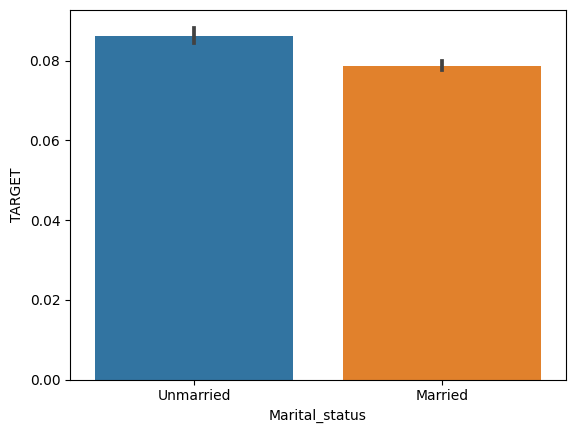

In [15]:
print(df_train.Marital_status.value_counts())
print(df_train["Marital_status"].value_counts(normalize=True))
sns.barplot(x='Marital_status', y='TARGET', data=df_train)

Dari grafik diatas, jumlah orang yang mempunyai pinjaman dalam kategori married dan ummaried tidak jauh berbeda sehingga kita tidak perlu memperhatikan kolom status keluarga ini.

## Umur dari Pengguna

Karena tidak ada kolom 'umur', maka kita akan membuat kolom tersebut dari kolom 'DAYS_BIRTH' dengan mengurangi tanggal sekarang dengan tanggal lahir pengguna

In [16]:
df_train['Age'] = np.floor(df_train['DAYS_BIRTH'] / -365).astype(int)
df_train.drop(columns= 'DAYS_BIRTH', inplace=True)

Lalu kita akan membuat kategori umur baru dengan rentan berikut

1.Young Adults: 20-30

2.Middle Adults: 31-44

3.Older Adults: >45

In [17]:
age_cat = []
for i in df_train['Age']:
    if i < 31:
        age_cat.append('Young Adult')
    elif i < 45:
        age_cat.append('Middle Adult')
    else:
        age_cat.append('Older Adult')

df_train['Age_category'] = age_cat

In [34]:
g_age = df_train.groupby(['TARGET', 'Age_category'])['CODE_GENDER'].count().reset_index().sort_values('Age_category').reset_index()
g_age.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)
g_age.drop(columns = 'index', inplace=True)

name_of_ot = list(g_age['Age_category'].unique())
percentage = []

for i in name_of_ot:
    data = g_age[g_age['Age_category'] == i]
    total = data['Customers'].sum()
    for x,y in enumerate(data['Customers']):
        pct = round(y / total, 2)
        percentage.append(pct)

g_age['percentage'] = percentage

mapping_target = {
    1 : 'Mempunyai masalah',
    0 : 'Tidak mempunyai masalah'
}

g_age['TARGET'] = g_age['TARGET'].map(mapping_target)
g_age

,TARGET,Age_category,Customers,percentage
0,Tidak mempunyai masalah,Middle Adult,105633,0.91
1,Mempunyai masalah,Middle Adult,10276,0.09
2,Tidak mempunyai masalah,Older Adult,130266,0.94
3,Mempunyai masalah,Older Adult,8530,0.06
4,Tidak mempunyai masalah,Young Adult,46787,0.89
5,Mempunyai masalah,Young Adult,6019,0.11


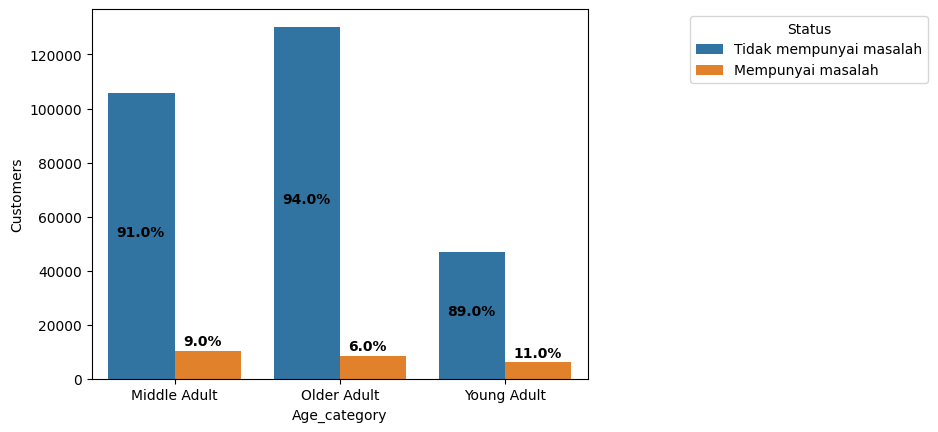

In [37]:
ax = sns.barplot(x = 'Age_category', y= 'Customers', hue= g_age.TARGET, data = g_age)
plt.legend(title = 'Status', bbox_to_anchor = (1.7,1))

for i, v in enumerate(g_age['Customers']):
    if i%2 == 0:
        plt.text(i/2 - 0.35, v/2, s= str(g_age['percentage'][i]* 100) + '%', color='black', fontweight='bold')
    else:
        plt.text(i/2 - 0.45, v + 2000, s= str(g_age['percentage'][i] * 100) + '%', color='black', fontweight='bold')

plt.show(ax)

Dari grafik diatas dapat dilihat dari ketiga kategori, older adults mempunyai nilai persen tertinggi dalam tidak mempunyai masalah dalam pembyaran pinjaman, maka HCI dapat merujukkan jasa pinjamannya terutama kepada kalangan older adults berusia diatas 45 tahun

## Kontrak

In [38]:
ct = df_train.groupby(['TARGET', 'NAME_CONTRACT_TYPE'])['CODE_GENDER'].count().reset_index().sort_values(by = 'NAME_CONTRACT_TYPE')
ct.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)
        
name_of_ct = list(ct['NAME_CONTRACT_TYPE'].unique())
percentage = []

for i in name_of_ct:
    data = ct[ct['NAME_CONTRACT_TYPE'] == i]
    total = data['Customers'].sum()
    for x,y in enumerate(data['Customers']):
        pct = round(y / total, 2)
        percentage.append(pct)
        
ct['Percent'] = percentage
ct

,TARGET,NAME_CONTRACT_TYPE,Customers,Percent
0,0,Cash loans,255011,0.92
2,1,Cash loans,23221,0.08
1,0,Revolving loans,27675,0.95
3,1,Revolving loans,1604,0.05


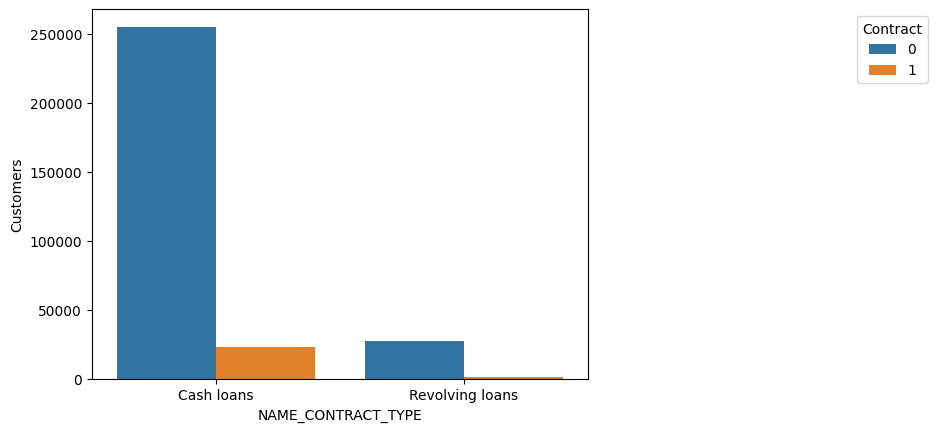

In [43]:
ax = sns.barplot(x = 'NAME_CONTRACT_TYPE', y= 'Customers', hue= ct.TARGET, data = ct)
plt.legend(title = 'Contract', bbox_to_anchor = (1.7,1))

Dibandingkan dengan revolving loans, orang suka memakai cash loans

## Tipe penghasilan pengguna

In [45]:
itc = df_train.groupby(['TARGET', 'NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE'])['CODE_GENDER'].count().reset_index().sort_values(['NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE']).reset_index()
itc.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)
itc.drop(columns = 'index', inplace=True)

income_type   = list(itc['NAME_INCOME_TYPE'].unique())
percentage  = []

for i in income_type:
    data = itc[itc.NAME_INCOME_TYPE == i]
    contract_type = list(data['NAME_CONTRACT_TYPE'].unique())
    for x in contract_type:
        data2 = data[data.NAME_CONTRACT_TYPE == x]
        total = data2['Customers'].sum()
        for y,z in enumerate(data2['Customers']):
            pct = round(z / total, 2)
            percentage.append(pct)
            
itc['percentage'] = percentage
itc

,TARGET,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,Customers,percentage
0,0,Businessman,Revolving loans,10,1.00
1,0,Commercial associate,Cash loans,58662,0.92
2,1,Commercial associate,Cash loans,4990,0.08
3,0,Commercial associate,Revolving loans,7595,0.95
4,1,Commercial associate,Revolving loans,370,0.05
5,1,Maternity leave,Cash loans,2,1.00
6,0,Maternity leave,Revolving loans,3,1.00
7,0,Pensioner,Cash loans,49151,0.95
8,1,Pensioner,Cash loans,2842,0.05
9,0,Pensioner,Revolving loans,3229,0.96


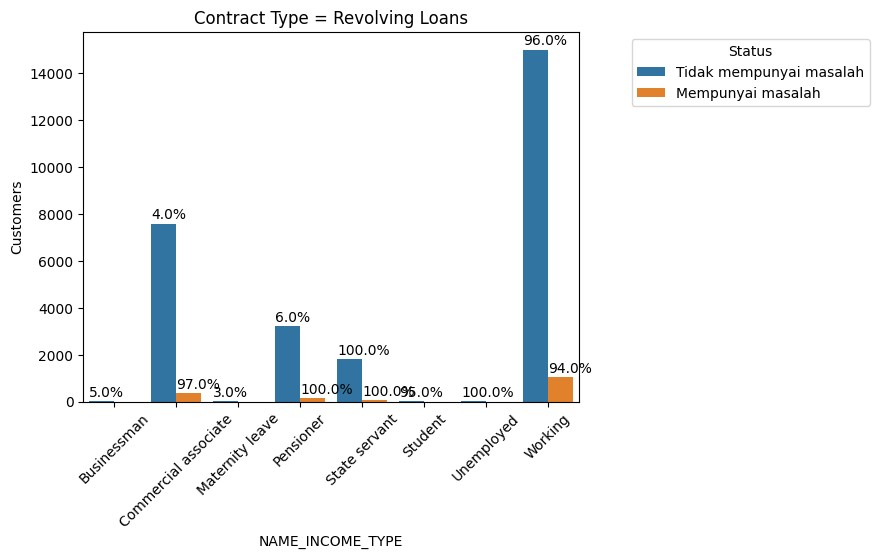

In [48]:
itc_rl = itc[itc['NAME_CONTRACT_TYPE'] == 'Revolving loans'].reset_index()

mapping_target = {
    1 : 'Mempunyai masalah',
    0 : 'Tidak mempunyai masalah'
}

itc_rl['TARGET'] = itc_rl['TARGET'].map(mapping_target)

ax = sns.barplot(x = 'NAME_INCOME_TYPE', y= 'Customers', data = itc_rl, hue = 'TARGET')
plt.title('Contract Type = Revolving Loans')
plt.xticks(rotation=45)
plt.legend(title = 'Status', bbox_to_anchor = (1.6,1))

i = 0
itc_p = itc_rl.sort_values('TARGET').reset_index()
for p in ax.patches:
    widht, height = p.get_x(), p.get_height()
    if np.isnan(height) == True:
        continue
    else:
        plt.text(widht, height + 200, s = str(itc_p['percentage'][i]* 100) + '%' )
        i = i +1
        
plt.show()

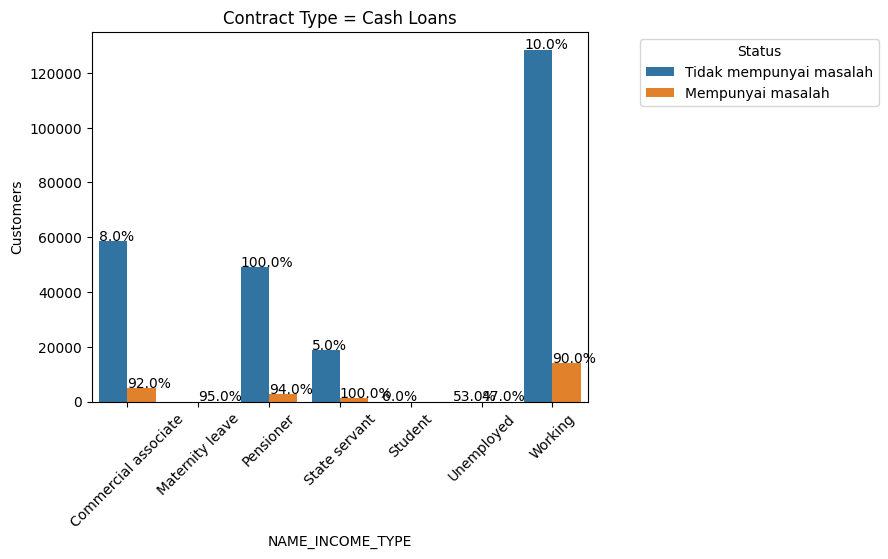

In [50]:
itc_cl = itc[itc['NAME_CONTRACT_TYPE'] == 'Cash loans'].reset_index()

mapping_target = {
    1 : 'Mempunyai masalah',
    0 : 'Tidak mempunyai masalah'
}

itc_cl['TARGET'] = itc_cl['TARGET'].map(mapping_target)

ax = sns.barplot(x = 'NAME_INCOME_TYPE', y= 'Customers', data = itc_cl, hue = 'TARGET')
plt.title('Contract Type = Cash Loans')
plt.xticks(rotation=45)
plt.legend(title = 'Status', bbox_to_anchor = (1.6,1))

i = 0
itc_p2 = itc_cl.sort_values('TARGET').reset_index()
for p in ax.patches:
    widht, height = p.get_x(), p.get_height()
    if np.isnan(height) == True:
        continue
    else:
        plt.text(widht, height + 200, s = str(itc_p2['percentage'][i]* 100) + '%' )
        i = i +1
        
plt.show()

Dari kedua tipe kontrak, pengguna dengan pekerjaan tidak ada masalah dalam membayar pinjaman.

## Pekerjaan

In [52]:
ot = df_train.groupby(['TARGET', 'OCCUPATION_TYPE'])['CODE_GENDER'].count().reset_index().sort_values(by=['OCCUPATION_TYPE', 'TARGET'])
ot.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

name_of_ot = list(ot['OCCUPATION_TYPE'].unique())
percentage = []

for i in name_of_ot:
    data = ot[ot['OCCUPATION_TYPE'] == i]
    total = data['Customers'].sum()
    for x,y in enumerate(data['Customers']):
        pct = round(y / total, 2)
        percentage.append(pct)

ot['percentage'] = percentage
ot

,TARGET,OCCUPATION_TYPE,Customers,percentage
0,0,Accountants,9339,0.95
18,1,Accountants,474,0.05
1,0,Cleaning staff,4206,0.90
19,1,Cleaning staff,447,0.10
2,0,Cooking staff,5325,0.90
20,1,Cooking staff,621,0.10
3,0,Core staff,25832,0.94
21,1,Core staff,1738,0.06
4,0,Drivers,16496,0.89
22,1,Drivers,2107,0.11


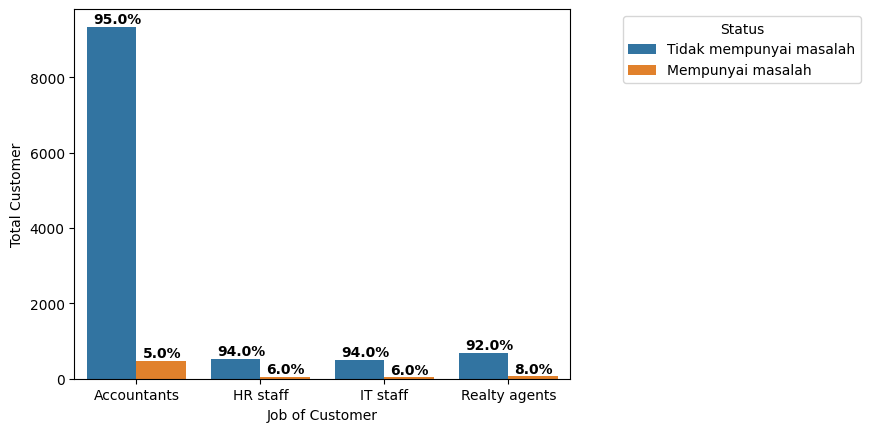

In [54]:
ot_2 = ot[ot['OCCUPATION_TYPE'].isin(['HR staff', 'IT staff', 'Realty agents', 'Accountants'])]
ot_2 = ot_2.reset_index()
ot_2.drop(columns = 'index', inplace=True)

mapping_target = {
    1 : 'Mempunyai masalah',
    0 : 'Tidak mempunyai masalah'
}

ot_2['TARGET'] = ot_2['TARGET'].map(mapping_target)


ax = sns.barplot(x = 'OCCUPATION_TYPE', y= 'Customers', hue= 'TARGET', data = ot_2)
plt.xlabel('Job of Customer')
plt.ylabel('Total Customer')
plt.legend(title = 'Status', bbox_to_anchor = (1.6,1))

for i, v in enumerate(ot_2['Customers']):
    if i%2 == 0:
        plt.text(i/2 - 0.35, v + 100, s= str(ot_2['percentage'][i]* 100) + '%', color='black', fontweight='bold')
    else:
        plt.text(i/2 - 0.45, v + 100, s= str(ot_2['percentage'][i] * 100) + '%', color='black', fontweight='bold')

plt.show(ax)

Dari tabel diatas, dapat dilihat pengguna dengan pekerjaan HR Staff, IT Staff, dan Realyt Agents mempunyai persenan tinggi untuk diterima pinjamannya sekitar 92%-94%, tetapi jumlah orang yang mempunyai pinjaman dalam ketiga pekerjaan ini kurang dari 1000, sehingga sangat direkomendasikan untuk membuat campaign terhadap mereka.

# Data Cleaning

In [112]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier

In [68]:
def overview(df, message):
  print(f'{message}:\n')
  print('Rows:', df.shape[0])
  print('\nColumns:', df.shape[1])
  print('\nThe list of Columns:')
  print( df.columns.tolist())
  print('\nMissing Value:', df.isna().sum().values.sum())
  print('\nList of Missing Value:')
  print(df.isna().sum())
  print('\nDuplicated Value:', df.duplicated().sum())
  print('\nUnique Value:')
  print(df.nunique())

In [69]:
overview(df_train, 'Overview of Training Data')

Overview of Training Data:

Rows: 307511

Columns: 123

The list of Columns:
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 

Tidak terdapat duplikat data, tetapi banyak missing value. Mari kita lihat lebih detil mengenai missing value.

In [70]:
count_mv = pd.DataFrame(df_train.isnull().sum(), columns=['Total Null Data']).reset_index()
count_mv['Percentage'] = ( count_mv['Total Null Data'] / len(df_train) ) * 100
count_mv[count_mv['Percentage'] > 40].sort_values(by='Percentage', ascending=False)

,index,Total Null Data,Percentage
46,COMMONAREA_AVG,214865,69.872297
74,COMMONAREA_MEDI,214865,69.872297
60,COMMONAREA_MODE,214865,69.872297
82,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
68,NONLIVINGAPARTMENTS_MODE,213514,69.432963
54,NONLIVINGAPARTMENTS_AVG,213514,69.432963
84,FONDKAPREMONT_MODE,210295,68.386172
80,LIVINGAPARTMENTS_MEDI,210199,68.354953
52,LIVINGAPARTMENTS_AVG,210199,68.354953
66,LIVINGAPARTMENTS_MODE,210199,68.354953


Kita akan membuang data yang mempunyai nilai missing value lebih dari 50%

In [71]:
data = list(count_mv[count_mv['Percentage'] > 50]['index'])
df_train = df_train.drop(columns = data)
df_train = df_train.drop(columns = 'SK_ID_CURR')

In [72]:
count_mv = pd.DataFrame(df_train.isnull().sum(), columns=['Total Null Data']).reset_index()
count_mv['Percentage'] = ( count_mv['Total Null Data'] / len(df_train) ) * 100
still_null = count_mv[count_mv['Percentage'] != 0].sort_values(by='Percentage', ascending=False)

In [73]:
a = list(still_null['index'])
df_train[a].dtypes

for i in a:
    data = df_train[i]
    types = str(data.dtype)
    if types == 'object':
        df_train[i].fillna(df_train[i].mode()[0], inplace=True)
    else:
        df_train[i].fillna(df_train[i].median(), inplace=True)

In [74]:
count_mv = pd.DataFrame(df_train.isnull().sum(), columns=['Total Null Data']).reset_index()
count_mv['Percentage'] = ( count_mv['Total Null Data'] / len(df_train) ) * 100
count_mv[count_mv['Percentage'] > 0].sort_values(by='Percentage', ascending=False)

,index,Total Null Data,Percentage


In [75]:
#Mengganti nilai unknown
df_train['CODE_GENDER'] = df_train['CODE_GENDER'].replace(['XNA'], df_train['CODE_GENDER'].mode()[0])
df_train['ORGANIZATION_TYPE'] = df_train['ORGANIZATION_TYPE'].replace(['XNA'], df_train['ORGANIZATION_TYPE'].mode()[0])

In [77]:
#Menghapus kolom Flag Document
FLAG_DOCUMENT = [col for col in df_train.columns if 'FLAG_DOCUMENT' in col]
df_train.drop(columns = FLAG_DOCUMENT, axis=1, inplace=True)

In [78]:
#Menghapus kolom Kategori Age
df_train.drop(columns = 'Age_category', inplace=True)

# Feature Engineering 

In [80]:
x = df_train.drop(columns = 'TARGET')

## Data Numerik

In [81]:
num = x.select_dtypes(exclude='object')

In [82]:
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-637,-3648.0,-2120,1,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1188,-1186.0,-291,1,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-225,-4260.0,-2531,1,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-3039,-9833.0,-2437,1,...,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,52
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-3038,-4311.0,-3458,1,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54


In [83]:
#ganti nilai negative ke positif
negative_column = num.columns[(num < 0).any()].tolist()
num[negative_column] = num[negative_column] * -1
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,637,3648.0,2120,1,...,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,1188,1186.0,291,1,...,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,225,4260.0,2531,1,...,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,3039,9833.0,2437,1,...,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,52
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,3038,4311.0,3458,1,...,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54


In [85]:
#mengambil tipe data numerik yang mempunyai unique value lebih dari >2
df_num = pd.DataFrame(num.nunique(), columns = ['Total_unique']).reset_index()
df_num = df_num.rename(columns = {'index' : 'Name_of_column'})

num_a = []
num_b = []
for i,y in enumerate(df_num.Name_of_column):
    if df_num['Total_unique'][i] > 2:
        num_a.append(y)
    else:
        num_b.append(y)

C:\Users\Cindy\AppData\Local\Temp\ipykernel_5628\2395281968.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Cindy\AppData\Local\Temp\ipykernel_5628\2395281968.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Cindy\AppData\Local\Temp\ipykernel_5628\2395281968.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Cindy\AppData\Local\Temp\ipykernel_5628\2395281968.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Cindy\AppData\Local\Temp\ipykernel_5628\2395281968.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Cindy\AppData\Local\Temp\ipykernel_5628\2395281968.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Cindy\AppData\Local\Temp\ipykernel_5628\2395281968.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Cindy\AppData\Loca

ValueError: num must be an integer with 1 <= num <= 28, not 29

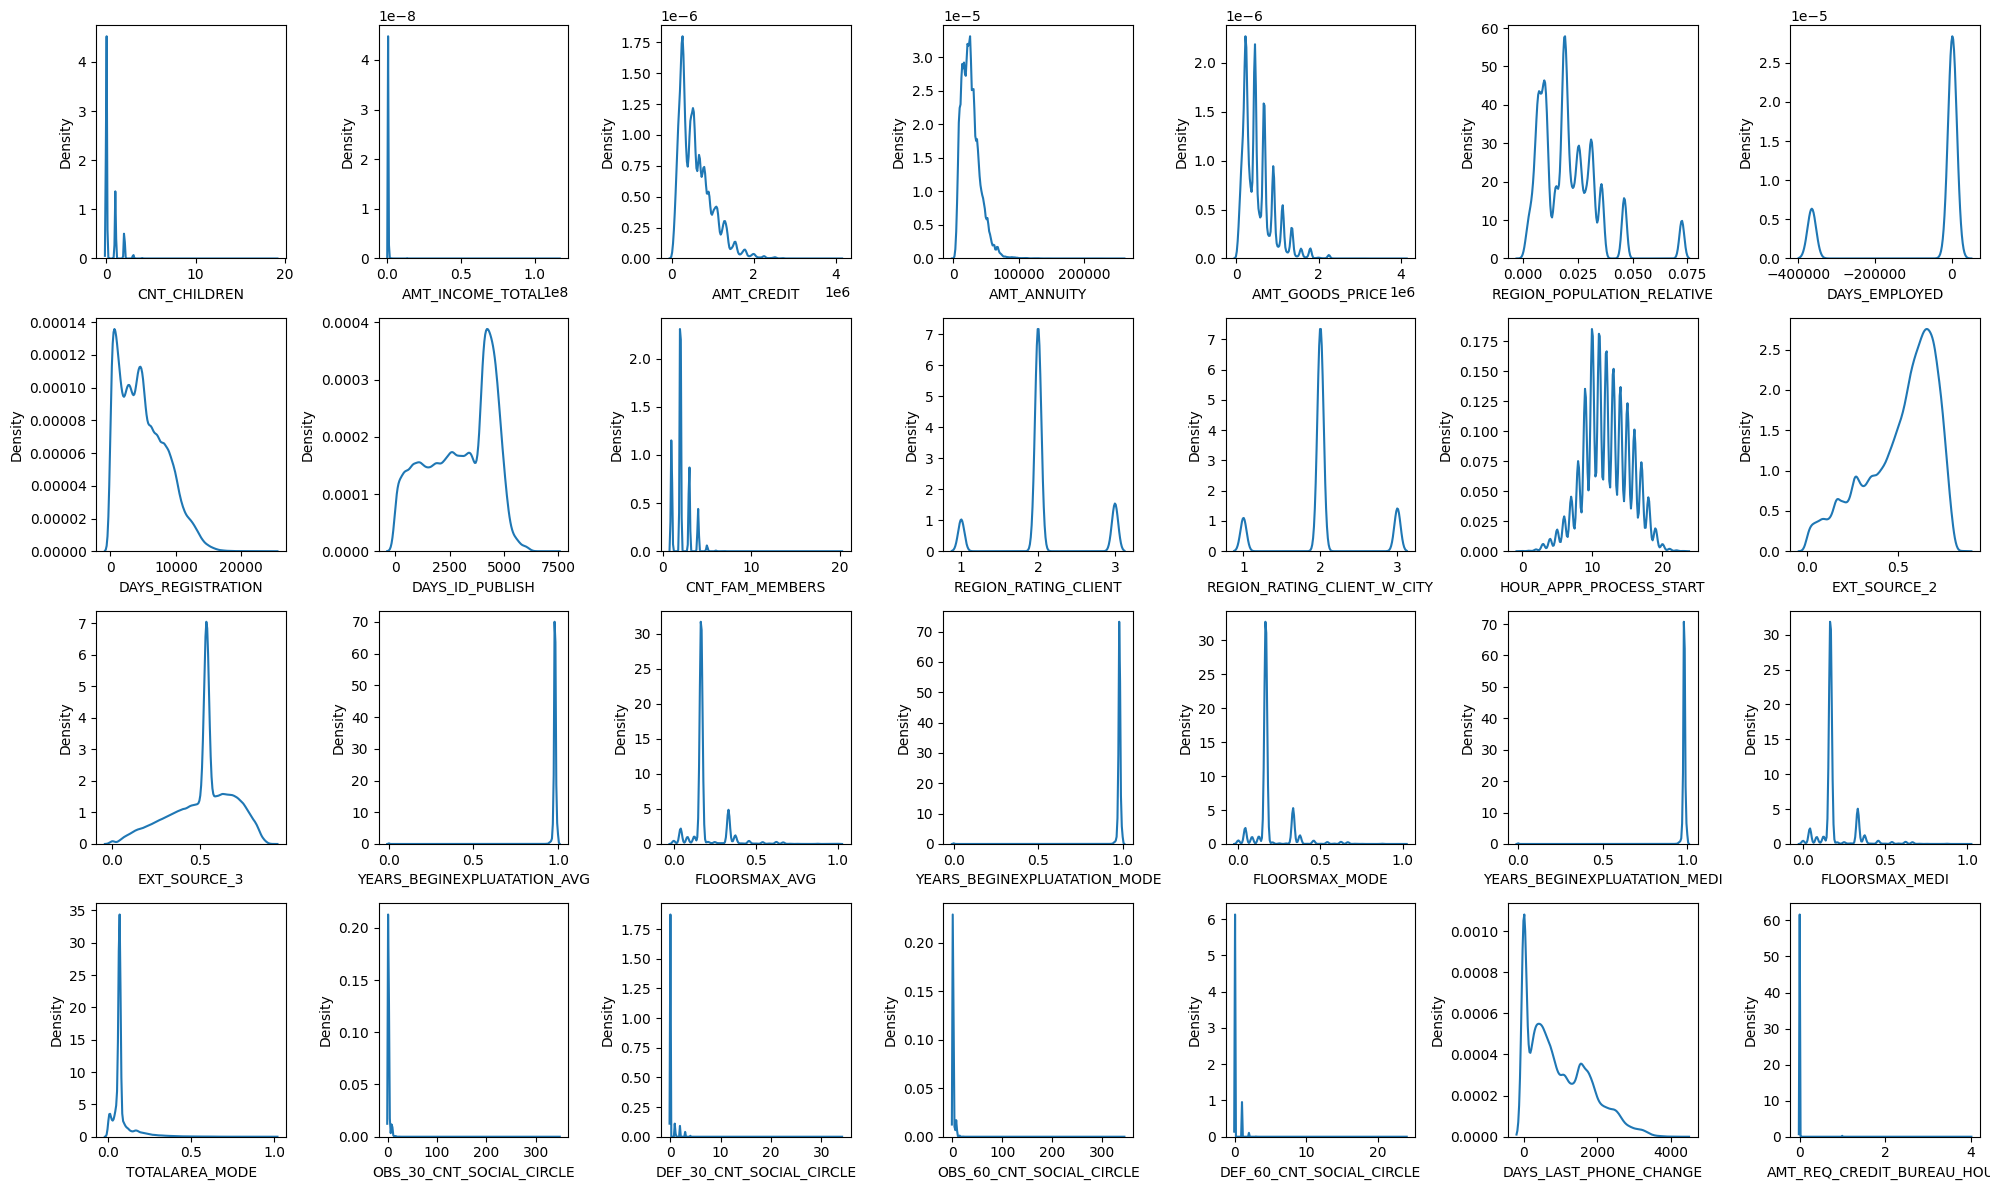

In [92]:
plt.figure(figsize=(20,12))

for i, column in enumerate (num[num_a].columns, 1):
    plt.subplot(4,7,i)
    sns.kdeplot(data=num[num_a], x=num[column])
    plt.tight_layout()

Data Distribusi tidak mendekati normal distribusi, maka harus di normalisasi.

C:\Users\Cindy\AppData\Local\Temp\ipykernel_5628\4285679548.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Cindy\AppData\Local\Temp\ipykernel_5628\4285679548.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Cindy\AppData\Local\Temp\ipykernel_5628\4285679548.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Cindy\AppData\Local\Temp\ipykernel_5628\4285679548.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Cindy\AppData\Local\Temp\ipykernel_5628\4285679548.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Cindy\AppData\Local\Temp\ipykernel_5628\4285679548.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Cindy\AppData\Local\Temp\ipykernel_5628\4285679548.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Cindy\AppData\Loca

ValueError: num must be an integer with 1 <= num <= 28, not 29

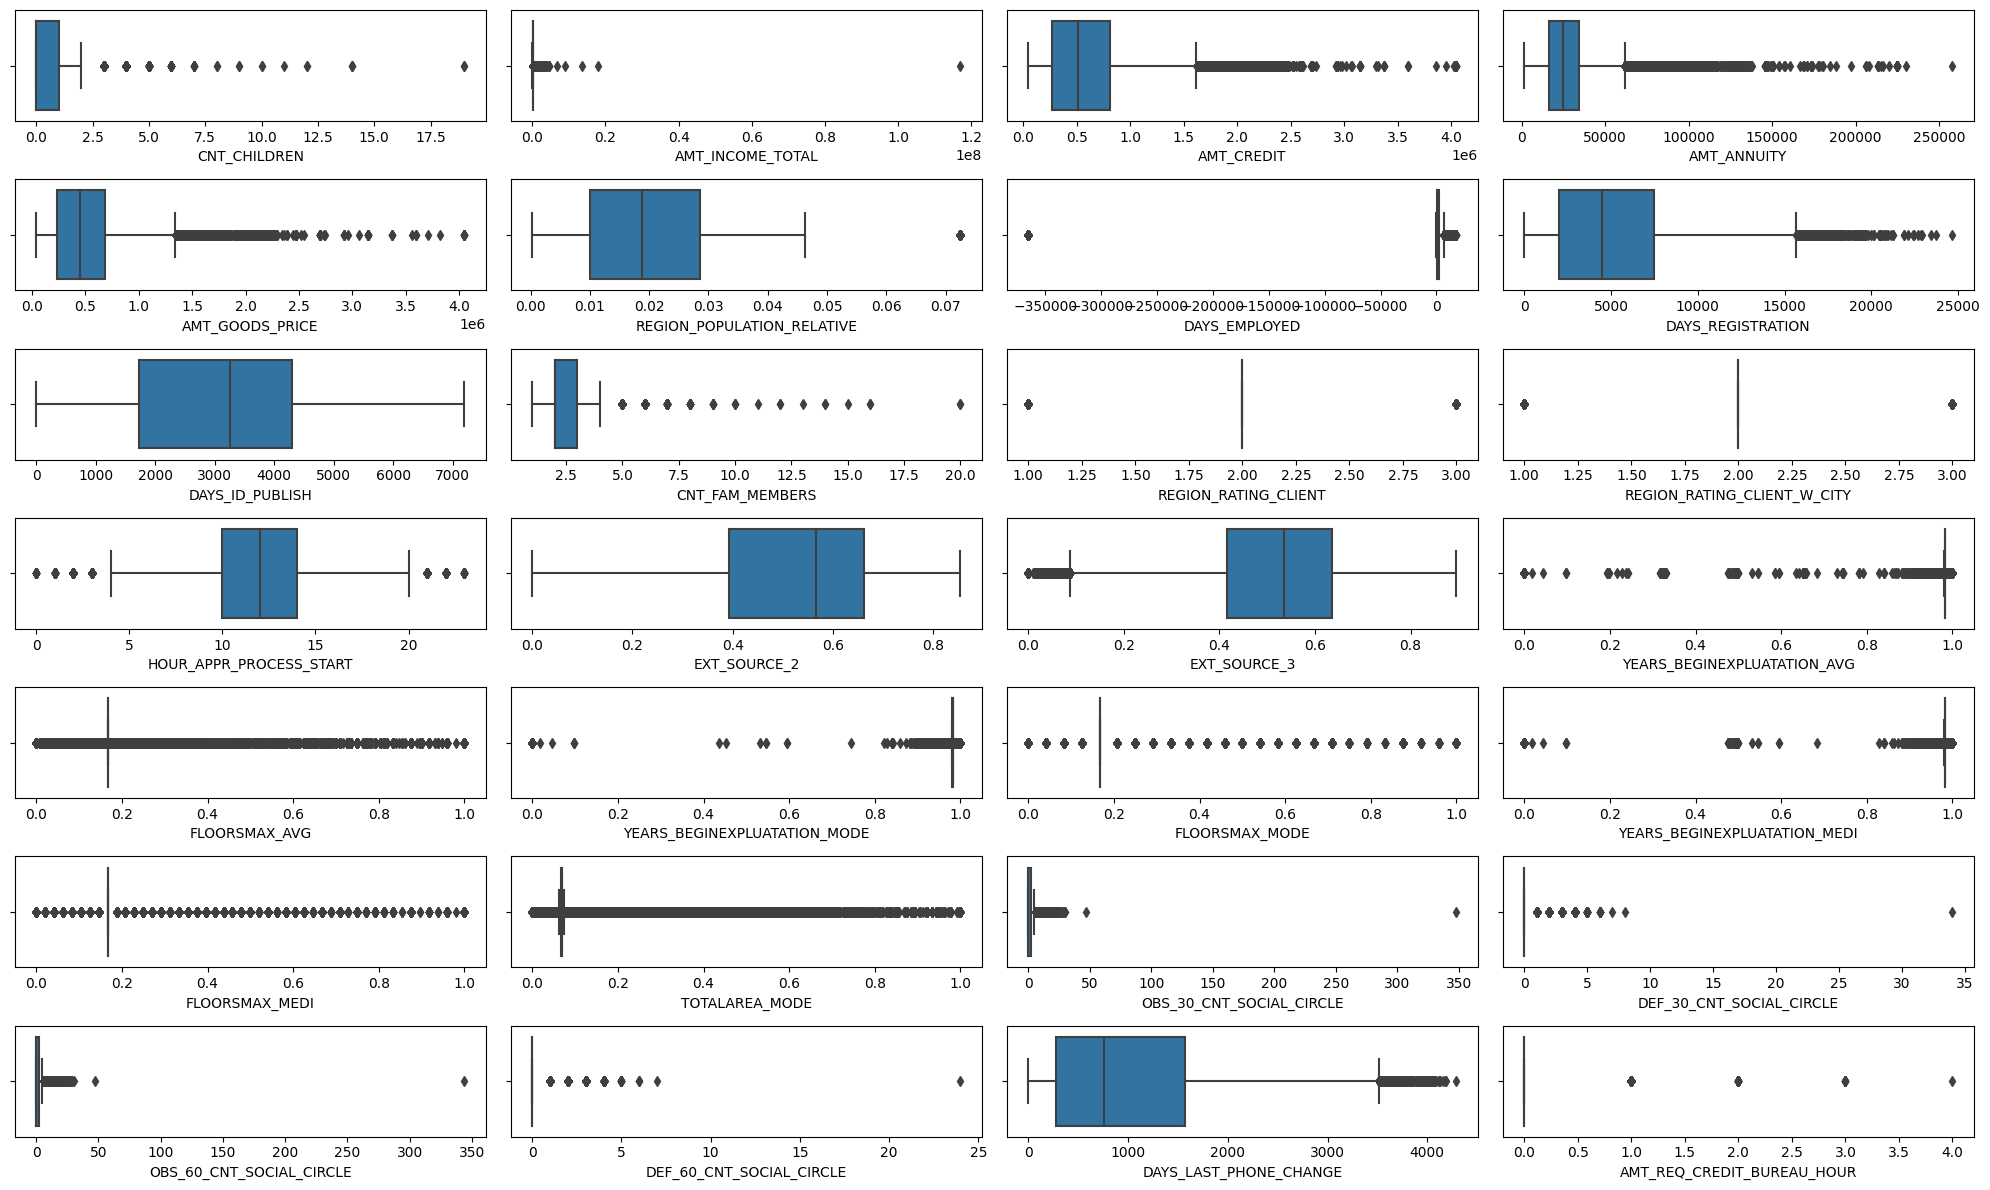

In [93]:
plt.figure(figsize=(20,12))

for i, column in enumerate (num[num_a].columns, 1):
    plt.subplot(7,4,i)
    sns.boxplot(data=num[num_a], x=num[column])
    plt.tight_layout()

kolom yang aneh adalah CNT_CHILDREN kolom, maka kita akan menghapus outlier di kolom tersebut

## Menghapus Outlier

In [94]:
print(f'Row before delete outlier at CNT_children :  {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))

zscore = abs(stats.zscore(df_train['CNT_CHILDREN'])) # hitung absolute z-scorenya
filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_train = df_train[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Row after delete outlier at CNT_children : {len(df_train)}')

Row before delete outlier at CNT_children :  307511
Row after delete outlier at CNT_children : 303239


## Feature Transformation

In [95]:
x = df_train.drop(columns = 'TARGET', axis=1)
num = x[num_a]

In [96]:
num_mean = num.mean()
num_std = num.std()

num = (num - num_mean) / num_std
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
0,-0.589198,0.141631,-0.477744,-0.165346,-0.506964,-0.150759,-0.459710,0.385831,0.577304,-1.320962,...,0.252564,5.254914,-0.206172,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-0.441070,-1.544674
1,-0.589198,0.424753,1.725509,0.594213,1.600729,-1.253789,-0.463592,1.083617,1.789288,-0.131831,...,-0.168056,-0.275683,0.163731,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106,0.122835
2,-0.589198,-0.424615,-1.152447,-1.405069,-1.091757,-0.784603,-0.456807,0.212377,0.304955,-1.320962,...,-0.588676,-0.275683,0.179446,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106,0.706463
3,-0.589198,-0.141492,-0.711048,0.179004,-0.653162,-0.930108,-0.476632,-1.367137,0.367244,-0.131831,...,0.252564,-0.275683,0.418795,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-0.441070,0.706463
4,-0.589198,-0.198116,-0.213418,-0.361141,-0.068369,0.562091,-0.476625,0.197922,-0.309320,-1.320962,...,-0.588676,-0.275683,-0.172324,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106,0.873213


In [97]:
num_1 = x[num_b]
num_1 = num_1.loc[~num_1.index.duplicated(keep='first')]

num = pd.concat([num, num_1], axis=1)
num

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,...,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,-0.589198,0.141631,-0.477744,-0.165346,-0.506964,-0.150759,-0.459710,0.385831,0.577304,-1.320962,...,0,1,1,0,0,0,0,0,0,0
1,-0.589198,0.424753,1.725509,0.594213,1.600729,-1.253789,-0.463592,1.083617,1.789288,-0.131831,...,0,1,1,0,0,0,0,0,0,0
2,-0.589198,-0.424615,-1.152447,-1.405069,-1.091757,-0.784603,-0.456807,0.212377,0.304955,-1.320962,...,1,1,1,0,0,0,0,0,0,0
3,-0.589198,-0.141492,-0.711048,0.179004,-0.653162,-0.930108,-0.476632,-1.367137,0.367244,-0.131831,...,0,1,0,0,0,0,0,0,0,0
4,-0.589198,-0.198116,-0.213418,-0.361141,-0.068369,0.562091,-0.476625,0.197922,-0.309320,-1.320962,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,-0.589198,-0.047118,-0.855088,0.032003,-0.848093,0.843848,-0.456884,-0.976864,0.668749,-1.320962,...,0,1,0,0,0,0,0,0,0,0
307507,-0.589198,-0.405740,-0.818198,-1.042382,-0.848093,0.309175,2.118014,0.176098,-0.728114,-1.320962,...,0,1,1,0,0,0,0,0,0,0
307508,-0.589198,-0.065993,0.195641,0.199205,0.126562,-1.148184,-0.511027,-0.489661,-1.430522,-1.320962,...,0,1,0,1,0,0,0,0,1,1
307509,-0.589198,0.009507,-0.568393,-0.475821,-0.592246,-1.125704,-0.488940,0.693628,1.365193,-0.131831,...,0,1,0,0,0,0,0,1,1,0


## Data Object

In [98]:
obj = x.select_dtypes(include='object')
df_obj = pd.DataFrame(obj.nunique(), columns = ['Total_unique']).reset_index()
df_obj = df_obj.rename(columns = {'index' : 'Name_of_column'})

obj_1 = []
obj_2 = []
for i,y in enumerate(df_obj.Name_of_column):
    if df_obj['Total_unique'][i] > 2:
        obj_1.append(y)
    else:
        obj_2.append(y)
obj

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,Marital_status
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No,Unmarried
1,Cash loans,F,N,N,Family,State servant,Higher education,House / apartment,Core staff,MONDAY,School,No,Married
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,MONDAY,Government,No,Unmarried
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No,Married
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,House / apartment,Core staff,THURSDAY,Religion,No,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,With parents,Sales staff,THURSDAY,Services,No,Unmarried
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,House / apartment,Laborers,MONDAY,Business Entity Type 3,No,Unmarried
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,House / apartment,Managers,THURSDAY,School,No,Unmarried
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,No,Married


## One hot Encoding

In [99]:
for cat in obj_1:
    onehots = pd.get_dummies(obj[cat], prefix=cat)
    obj = obj.join(onehots)
    
obj = obj.drop(columns = obj_1)

## Label Encoding

In [102]:
label_encoder = preprocessing.LabelEncoder()
  
for cat in obj_2:
    obj[cat]= label_encoder.fit_transform(obj[cat])
    
obj

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE,Marital_status,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,0,1,0,1,0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,0,0,0,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1,1,1,0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,0,1,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,1,0,1,0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,1,0,0,0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307507,0,0,0,1,0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307508,0,0,0,1,0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307509,0,0,0,1,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [103]:
df_train2 = pd.concat([num, obj], axis=1)

In [104]:
df_train = pd.concat([df_train2, df_train['TARGET']],axis=1)

## Data Splitting

In [105]:
x = df_train.drop(columns = 'TARGET')
y = df_train['TARGET']

## Oversampling

In [106]:
sm = SMOTE(random_state = 2)
x_over, y_over = sm.fit_resample(x, y.ravel())

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=42)

## Undersampling

In [109]:
rus = RandomUnderSampler(random_state=42)
x_under, y_under = rus.fit_resample(x, y.ravel())

In [111]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_under, y_under, test_size=0.3, random_state=42)

# Training into the model

## Logistic Regression

### Oversampling Data

In [113]:
def confusionmatrix(predictions, y_test):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

C:\Users\Cindy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.90      1.00      0.94     83391
           1       0.99      0.88      0.94     83915

    accuracy                           0.94    167306
   macro avg       0.95      0.94      0.94    167306
weighted avg       0.95      0.94      0.94    167306



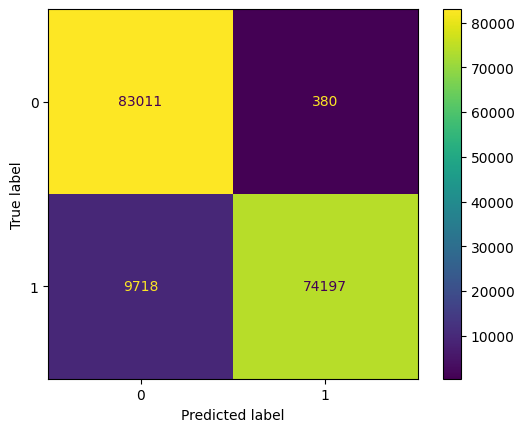

In [114]:
lr1 = LogisticRegression()
lr1.fit(x_train, y_train.ravel())
predictions = lr1.predict(x_test)
  
# print classification report
print(classification_report(y_test, predictions))
confusionmatrix(predictions, y_test)

              precision    recall  f1-score   support

           0       0.90      1.00      0.94    195452
           1       1.00      0.88      0.94    194928

    accuracy                           0.94    390380
   macro avg       0.95      0.94      0.94    390380
weighted avg       0.95      0.94      0.94    390380



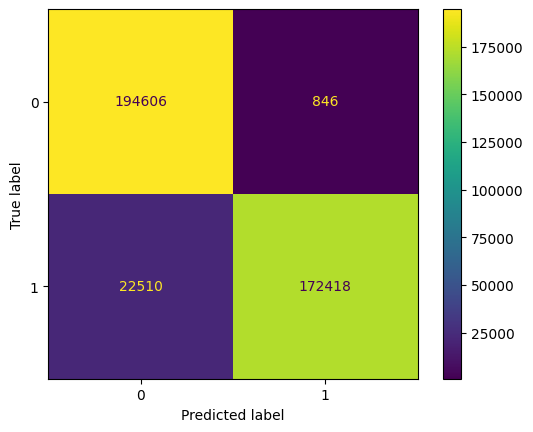

In [115]:
predictions = lr1.predict(x_train)
  
# print classification report
print(classification_report(y_train, predictions))
confusionmatrix(predictions, y_train)

### Undersampling Data

C:\Users\Cindy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.67      0.69      0.68      7289
           1       0.69      0.66      0.67      7349

    accuracy                           0.68     14638
   macro avg       0.68      0.68      0.68     14638
weighted avg       0.68      0.68      0.68     14638



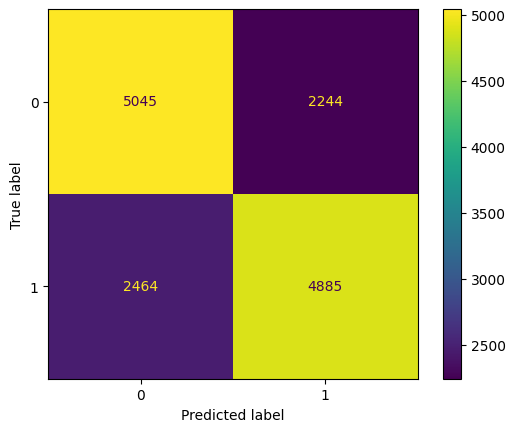

In [116]:
lr2 = LogisticRegression()
lr2.fit(x_train2, y_train2)
predictions2 = lr2.predict(x_test2)
  
# print classification report
print(classification_report(y_test2, predictions2))
confusionmatrix(predictions2, y_test2)

              precision    recall  f1-score   support

           0       0.68      0.69      0.68     17107
           1       0.68      0.67      0.68     17047

    accuracy                           0.68     34154
   macro avg       0.68      0.68      0.68     34154
weighted avg       0.68      0.68      0.68     34154



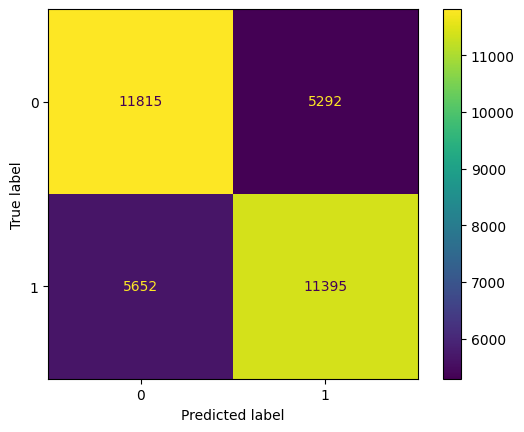

In [117]:
predictions = lr2.predict(x_train2)
  
# print classification report
print(classification_report(y_train2, predictions))
confusionmatrix(predictions, y_train2)

## XGBoost

### Oversampling Data

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     83391
           1       1.00      0.91      0.95     83915

    accuracy                           0.95    167306
   macro avg       0.96      0.95      0.95    167306
weighted avg       0.96      0.95      0.95    167306



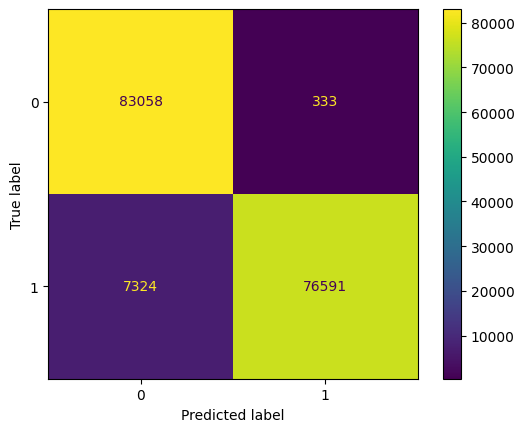

In [118]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train.ravel())

predictions = xgb_model.predict(x_test)
  
# print classification report
print(classification_report(y_test, predictions))
confusionmatrix(predictions, y_test)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    195452
           1       1.00      0.92      0.95    194928

    accuracy                           0.96    390380
   macro avg       0.96      0.96      0.96    390380
weighted avg       0.96      0.96      0.96    390380



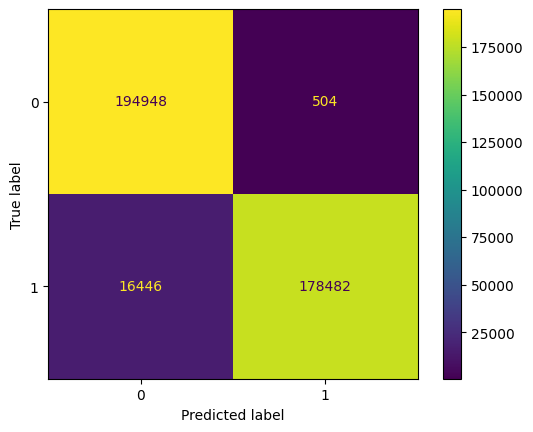

In [120]:
predictions = xgb_model.predict(x_train)
  
# print classification report
print(classification_report(y_train, predictions))
confusionmatrix(predictions, y_train)

## Random Forest

### Oversampling Data

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     83391
           1       0.98      0.93      0.95     83915

    accuracy                           0.95    167306
   macro avg       0.96      0.95      0.95    167306
weighted avg       0.96      0.95      0.95    167306



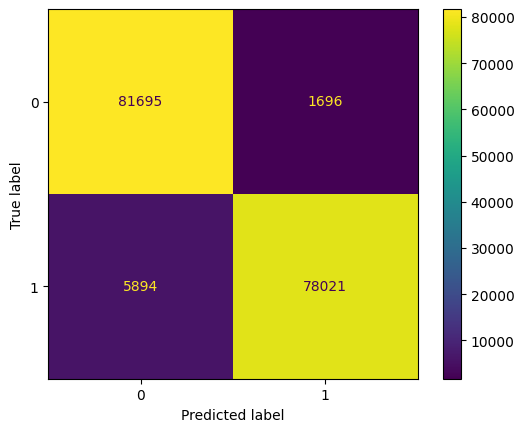

In [121]:
rf_model = RandomForestClassifier().fit(x_train, y_train)
predictions = rf_model.predict(x_test)
  
# print classification report
print(classification_report(y_test, predictions))
confusionmatrix(predictions, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    195452
           1       1.00      1.00      1.00    194928

    accuracy                           1.00    390380
   macro avg       1.00      1.00      1.00    390380
weighted avg       1.00      1.00      1.00    390380



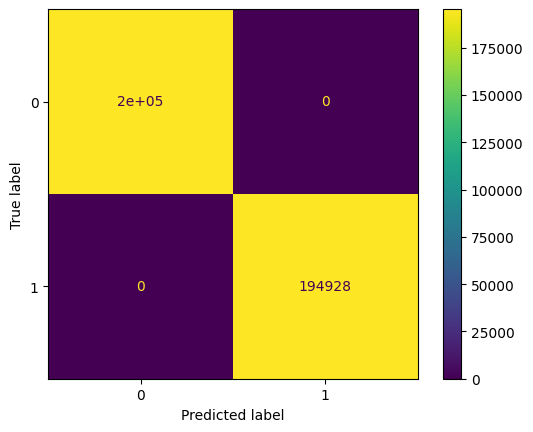

In [122]:
predictions = rf_model.predict(x_train)
  
# print classification report
print(classification_report(y_train, predictions))
confusionmatrix(predictions, y_train)

Dari keempat model, model random forest yang paling baik karena mempunyai accuracy, recall, 

# Predictions

In [123]:
df_test['CODE_GENDER'] = df_test['CODE_GENDER'].replace(['XNA'], df_test['CODE_GENDER'].mode()[0])
df_test['ORGANIZATION_TYPE'] = df_test['ORGANIZATION_TYPE'].replace(['XNA'], df_test['ORGANIZATION_TYPE'].mode()[0])

Marital_status = []
married = ['Married', 'Civil marriage']

for i in df_test.NAME_FAMILY_STATUS:
    if i in married:
        Marital_status.append('Married')
    else:
        Marital_status.append('Unmarried')

df_test['Marital_status'] = Marital_status
df_test.drop(columns= 'NAME_FAMILY_STATUS', inplace=True)

df_test['Age'] = np.floor(df_test['DAYS_BIRTH'] / -365).astype(int)
df_test.drop(columns= 'DAYS_BIRTH', inplace=True)

In [125]:
count_nv = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Data']).reset_index()
count_nv['Percentage'] = ( count_nv['Total Null Data'] / len(df_train) ) * 100
still_null = count_nv[count_nv['Percentage'] > 0].sort_values(by='Percentage', ascending=False)

In [126]:
a = list(still_null['index'])

for i in a:
    data = df_test[i]
    types = str(data.dtype)
    if types == 'object':
        df_test[i].fillna(df_test[i].mode()[0], inplace=True)
    else:
        df_test[i].fillna(df_test[i].median(), inplace=True)

In [127]:
num = df_test[num_a]

In [128]:
num = (num - num_mean) / num_std
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
0,-0.589198,-0.141492,-0.074799,-0.451269,-0.238934,-0.147217,-0.471630,-0.045538,1.444048,-0.131831,...,-0.588676,-0.275683,-0.938725,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106,0.706463
1,-0.589198,-0.292491,-0.934414,-0.671615,-0.969925,1.077392,-0.486707,-1.164490,0.906640,-0.131831,...,-0.588676,-0.275683,1.164645,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,0.691001,0.456336
2,-0.589198,0.141631,0.159868,2.947791,0.248394,-0.129074,-0.486630,0.803313,-0.339140,-0.131831,...,-0.588676,-0.275683,0.129884,-0.07111,-0.058754,-0.155798,-0.270044,1.032087,1.257036,0.873213
3,2.528453,0.613502,2.424807,1.514138,2.806865,0.397937,-0.468368,0.852911,-0.806307,2.246432,...,-0.588676,-0.275683,-1.017299,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,0.691001,-0.460793
4,0.969627,0.047256,0.066055,0.343410,0.236211,-0.784603,-0.470658,0.286066,-0.842090,1.057301,...,-0.588676,-0.275683,0.172193,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,0.124965,-0.710920


In [129]:
num_1 = df_test[num_b]
num_1 = num_1.loc[~num_1.index.duplicated(keep='first')]

num = pd.concat([num, num_1], axis=1)
num

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,...,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,-0.589198,-0.141492,-0.074799,-0.451269,-0.238934,-0.147217,-0.471630,-0.045538,1.444048,-0.131831,...,0,1,0,1,0,0,0,0,0,0
1,-0.589198,-0.292491,-0.934414,-0.671615,-0.969925,1.077392,-0.486707,-1.164490,0.906640,-0.131831,...,0,1,0,0,0,0,0,0,0,0
2,-0.589198,0.141631,0.159868,2.947791,0.248394,-0.129074,-0.486630,0.803313,-0.339140,-0.131831,...,0,1,0,0,0,0,0,0,0,0
3,2.528453,0.613502,2.424807,1.514138,2.806865,0.397937,-0.468368,0.852911,-0.806307,2.246432,...,0,1,1,0,0,0,0,0,0,0
4,0.969627,0.047256,0.066055,0.343410,0.236211,-0.784603,-0.470658,0.286066,-0.842090,1.057301,...,1,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,-0.589198,-0.198116,-0.462932,-0.664467,-0.726261,-1.362140,-0.491639,-1.157688,-0.270224,-1.320962,...,1,1,1,0,0,0,0,0,0,0
48740,2.528453,-0.047118,0.058386,0.332532,-0.117102,1.077392,-0.463317,0.565238,-0.007815,2.246432,...,0,1,0,0,0,0,0,0,1,1
48741,0.969627,0.141631,-0.705290,0.422038,-0.604429,0.397937,-0.476618,0.659901,0.985495,1.057301,...,0,1,1,0,0,0,0,0,0,0
48742,-0.589198,0.236005,-0.369923,-0.135821,-0.238934,-0.147217,-0.474462,1.005676,1.078266,-0.131831,...,1,1,1,0,0,1,1,0,1,1


In [130]:
obj = df_test.select_dtypes(include='object')

for cat in obj_1:
    onehots = pd.get_dummies(obj[cat], prefix=cat)
    obj = obj.join(onehots)
    
obj = obj.drop(columns = obj_1)

In [131]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
for cat in obj_2:
    obj[cat]= label_encoder.fit_transform(obj[cat])

obj

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,Marital_status,NAME_TYPE_SUITE_Children,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,0,0,0,1,reg oper account,block of flats,"Stone, brick",0,0,False,...,False,False,False,False,False,False,False,False,False,False
1,0,1,0,1,reg oper account,block of flats,Panel,0,0,False,...,False,False,False,False,False,False,False,False,False,False
2,0,1,1,1,reg oper account,block of flats,Panel,0,0,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,0,1,reg oper account,block of flats,Panel,0,0,False,...,False,False,False,False,False,False,False,False,False,False
4,0,1,1,0,reg oper account,block of flats,Panel,0,0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,0,0,1,reg oper account,block of flats,Panel,0,1,False,...,False,False,False,False,False,False,False,False,False,False
48740,0,0,0,0,reg oper account,block of flats,Panel,0,0,False,...,False,False,False,False,True,False,False,False,False,False
48741,0,0,1,1,reg oper account,block of flats,"Stone, brick",0,0,False,...,False,False,False,False,False,False,False,False,False,False
48742,0,1,0,0,reg oper account,block of flats,Panel,0,0,False,...,False,False,False,False,False,False,False,False,False,False


In [132]:
df_test = pd.concat([num, obj], axis=1)

In [134]:
train = set(df_train.columns)

In [135]:
train.remove('TARGET')

In [136]:
not_in_test = train - set(df_test.columns)
not_in_test = list(not_in_test)

In [137]:
df_test[not_in_test] = 0

In [139]:
column_train = list(df_train.columns)
column_train.remove('TARGET')
df_test = df_test[column_train]

In [140]:
predictions = rf_model.predict(df_test)

In [141]:
df_test['TARGET'] = predictions

In [142]:
df_test['TARGET'].value_counts()

TARGET
0    47219
1     1525
Name: count, dtype: int64